In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/question4-stock-data.csv')
df.head()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.shape

(11291, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11181 non-null  datetime64[ns]
 1   Adj Close  11198 non-null  float64       
 2   Close      11174 non-null  float64       
 3   High       11196 non-null  float64       
 4   Low        11164 non-null  float64       
 5   Open       11188 non-null  float64       
 6   Volume     11146 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 617.6 KB


In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,11181,2002-08-03 13:57:54.429836288,1980-03-17 00:00:00,1991-05-17 00:00:00,2002-07-26 00:00:00,2013-10-21 00:00:00,2024-12-27 00:00:00,NaN
Adj Close,11198.0,63.60913,2.259452,19.224636,50.6089,104.723621,254.770004,52.266247
Close,11174.0,72.026945,3.237711,27.5,66.035,114.297503,254.770004,51.259828
High,11196.0,72.5031,3.237711,27.789255,66.724998,114.8925,255.229996,51.550735
Low,11164.0,71.665079,3.237711,27.536156,65.418751,113.639999,253.589996,51.011632
Open,11188.0,67.999259,0.0,0.0,66.065002,114.269997,255.0,55.834401
Volume,11146.0,214415.698816,0.0,13500.0,90323.5,291575.0,18582700.0,388366.236049


In [21]:
df.isnull().sum()

,0
Date,110
Adj Close,93
Close,117
High,95
Low,127
Open,103
Volume,145


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

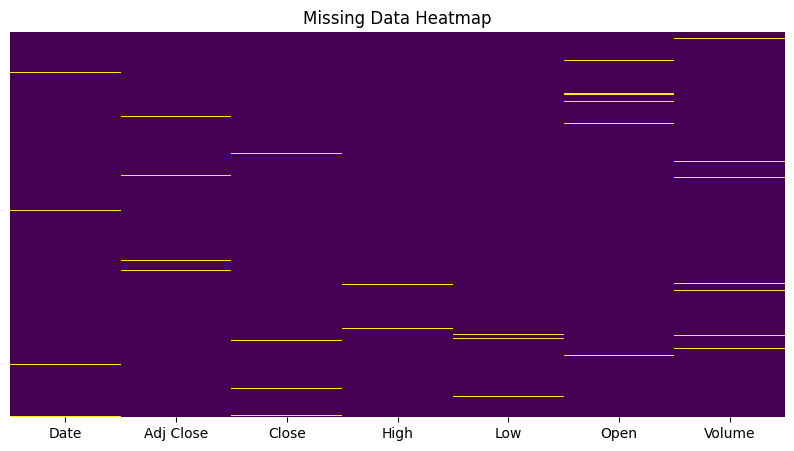

In [27]:
# Visualizing Missing Data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [28]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

,0
Date,0.974227
Adj Close,0.823665
Close,1.036224
High,0.841378
Low,1.124790
Open,0.912231
Volume,1.284209


In [6]:
!pip install sweetviz
import sweetviz as sv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 65.2 MB/s eta 0:00:00


In [7]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=4, cols=1,subplot_titles=('Open','High','Low','Close'))

fig.add_trace(
    Line(x=df.index, y=df.Open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.High),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.Low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.index, y=df.Close),
    row=4, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




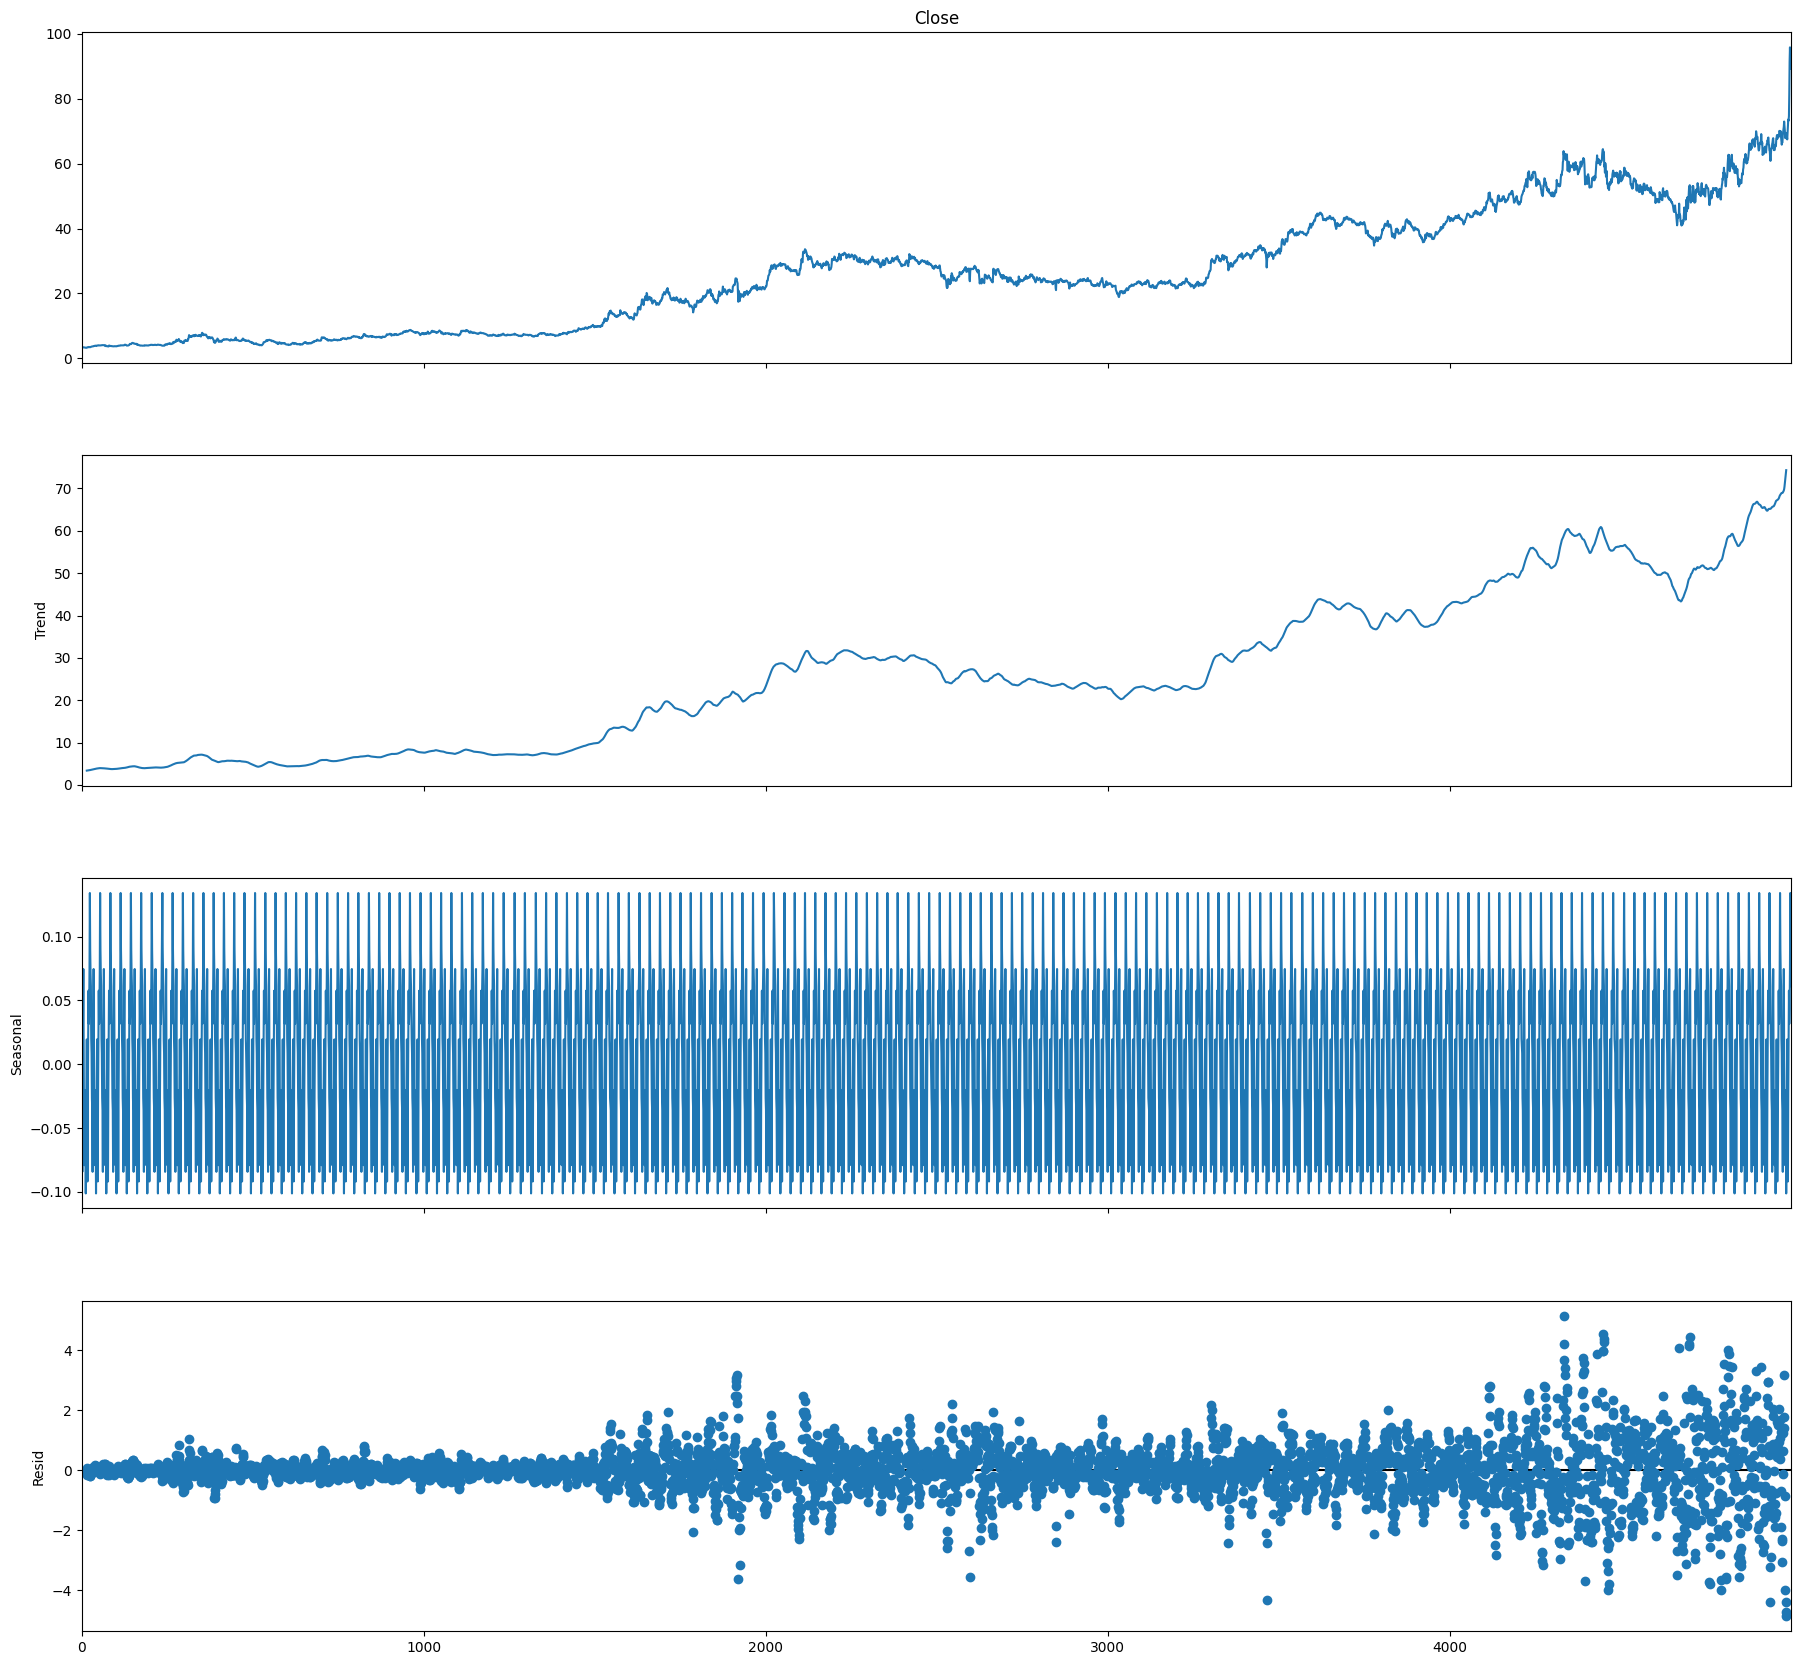

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = df.Close.head(5000).dropna()
result = seasonal_decompose(data, model='additive', period = 30)
fig = go.Figure()
fig = result.plot()
fig.set_size_inches(20, 19)